# Projeto Final - T319 (1S2022)

### Instruções

1. Quando você terminar os exercícios do projeto, vá até o menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
3. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão aceitas.
4. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
5. Todas as questões têm o mesmo peso.
6. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Substitua os nomes que já estão no campo abaixo.
7. Você pode consultar todo o material de aula.
8. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
9. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

## Exercícios

### 1) Regressão polinomial para previsão de temperatura.

Neste exercício, você utilizará técnicas de **validação cruzada** para encontrar um modelo que prejeva a temperatura de uma cidade na Hungria com base em dados coletados sobre o clima da cidade no intervalo 2006 a 2016. As informações das **colunas** contidas no conjunto de dados seguem abaixo.

|   |      Colunas     |
|:-:|:----------------:|
| 1 |  Formatted Date  |
| 2 |    Summary       |
| 3 |   Precip Type    |
| 4 |  Temperature (C)  |
| 5 |Apparent Temperature (C)|
| 6 |     Humidity     |
| 7 | Wind Speed (km/h)|
| 8 |Wind Bearing (degress)|
| 9 |  Visibility (km) |
| 10 |   Loud Cover    |
| 11 |Pressure (millibars)|
| 12 |  Daily Summary  |


Fonte dos dados: [Referência dados do Clima de Szeged](https://www.kaggle.com/budincsevity/szeged-weather?select=weatherHistory.csv)

**A) Execute a célula abaixo para importar os dados e as bibliotecas necessárias**.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas do arquivo.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Importa os dados.
df = pd.read_csv('https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/projeto/data_weather.csv')

# Mostra uma tabela com os 5 primeiros exemplos.
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**B) A célula abaixo cria a matriz de atributos e separa o rótulo dos atributos numéricos. Execute-a para realizar essa separação.**

**DICAS**

+ A função `drop` remove do conjunto atributos desnecessários à regressão.
+ A célula imprimirá as dimensões da matriz de atributos e do vetor de rótulos.

In [23]:
# Features/atributos
X = df.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary', 'Temperature (C)', 'Loud Cover', 'Apparent Temperature (C)'], axis=1)
print('Dimensão da matriz de atributos:', X.shape)

# Label/rótulo
y = df['Temperature (C)'].copy()
print('Dimensão da matriz de rótulos:',y.shape)

Dimensão da matriz de atributos: (43001, 5)
Dimensão da matriz de rótulos: (43001,)


**C) Com a matriz de atributos X e o vetor de rótulos y obtidos no item anterior, utilize a técnica de validação cruzada k-Fold para escolher a melhor ordem para o modelo. Para isso:**

 1. Use o **k-Fold** com **k** igual a 10 e o parâmetro `random_state=0`.
 2. Faça a análise de polinômios de ordem 1 até 6, **inclusive**.
 3. Inclua o atributo de bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=True`.
 4. Use a classe `StandardScaler` para normalizar os dados.
 5. Plote gráficos com a média e o desvio padrão do erro quadrático médio em função do grau do polinômio.

**DICAS** 

+ O tempo de execução desse exercício é de aproximadamente 10 minutos, mas pode variar de computador para computador, portanto, pegue um café e tenha paciência.

In [1]:
# Digite o código do exercício aqui.

**D) Após analisar os resultados do item anterior responda: Qual a melhor ordem do polinômio para esse problema? Justifique sua resposta.**

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

**E) De posse da melhor ordem, treine um novo modelo considerando esta ordem e no final imprima o valor do erro quadrático médio para os conjuntos de treinamento e de teste.**

**DICAS**

+ Separe 70% do conjunto de dados para o treinamento e 30% para o conjunto de validação com o parâmetro `random_state=0`.
+ Inclua o bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=True`.
+ Use a classe `StandardScaler` para normalizar os dados.

In [2]:
# Digite o código do exercício aqui.

### 2) Prevendo a qualidade de vinhos.

Neste exercício, você encontrará um modelo de regressão linear simples que, a partir das características fornecidas, determina a qualidade de um vinho dando uma nota de 0 a 10.

O conjunto de dados é constituído por 1599 exemplos contendo 11 variáveis de entrada (*atributos*) e 1 variável de saída (*rótulos*). Todas essas variáveis estão descritas pela tabela abaixo.


|   | Input variables (based on physicochemical tests) |
|:-:|:------------------------------------------------:|
| 1 |                  fixed acidity                   |
| 2 |                volatile acidity                  |
| 3 |                   citric acid                    |
| 4 |                 residual sugar                   |
| 5 |                    chlorides                     |
| 6 |                free sulfur dioxide               |
| 7 |                total sulfur dioxide              |
| 8 |                     density                      |
| 9 |                       pH                         |
| 10 |                    sulphates                    |
| 11 |                     alcohol                     |
|    |    **Output variable (based on sensory data)**  |
| 12 |          quality (score between 0 and 10)       |

Fonte dos dados: [Referência dos dados sobre vinho](https://archive.ics.uci.edu/ml/datasets/wine+quality)


**A) Execute a célula abaixo para importar os dados e as bibliotecas necessárias**.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas do arquivo.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Importa os dados
df = pd.read_csv('https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/projeto/winequality-red.csv', sep=';')

# Mostra uma tabela com os 5 primeiros exemplos 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**B) Com os dados importados, execute a próxima célula para separar os atributos e os rótulos**.

**DICAS**

+ A função `drop` remove do conjunto atributos desnecessários à regressão.
+ A célula imprimirá as dimensões da matriz de atributos e do vetor de rótulos.

In [73]:
# Features/Atributos
X = df.drop('quality', axis=1)
print('Dimensão da matriz de atributos:', X.shape)

# Label/Rótulo
y = df['quality'].copy()
print('Dimensão da matriz de rótulos:',y.shape)

Dimensão da matriz de atributos: (1599, 11)
Dimensão da matriz de rótulos: (1599,)


**C) Separe 80% do conjunto de dados para o treinamento e 20% para a validação**.

**DICAS**:

+ Use a função `train_test_split` da biblioteca SciKit-Learn.
+ Configure o parâmetro `random_state` da função `train_test_split` com o valor 42.

In [3]:
# Digite o código do exercício aqui.

**D) Neste item utilizaremos regressão polinomial para a aproximação. Utilize a técnica de validação cruzada do holdout para verificar polinômios de ordem 1 a 3, inclusive. Plote o gráfico dos erros de treinamento e validação em função da ordem do polinômio**.

**DICAS**

+ Use um objeto da classe `StandardScaler` para fazer a normalização dos dados.
+ Juntamente com objetos das classes `PolynomialFeatures` e `LinearRegression`, crie um pipeline de ações para o modelo.

In [4]:
# Digite o código do exercício aqui.

**E) Com base no gráfico apresentado no item anterior com o erro versus o grau do polinômio, qual seria a melhor ordem para o polinômio aproximador? Justifique sua resposta.**

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

### 3) Comparando o desempenho de modelos de regressão.

Nesse exercício, você fará o treinamento de dois modelos de regressão e ao final, comparará seus desempenhos.

**A) Execute a célula abaixo para importar os dados e as bibliotecas necessárias**.

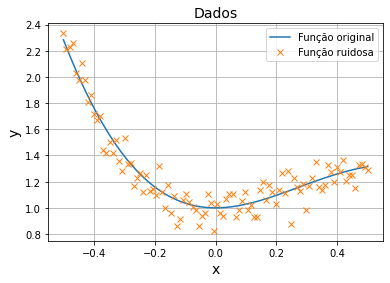

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Números de amostras.
N = 100

# Dados.
x = np.linspace(-0.5, 0.5, N).reshape(N, 1)
w = 0.1*np.random.randn(N, 1)
y = 2*x**7 - 4*x**3 + 3.2*x**2 + 1
y_noisy = y + w

# Visualização dos dados
plt.plot(x.ravel(), y.ravel(), label='Função original')
plt.plot(x.ravel(), y_noisy.ravel(), 'x', label='Função ruidosa')
plt.xlabel('x', fontsize=14) 
plt.ylabel('y', fontsize=14)
plt.title('Dados', fontsize=14)
plt.grid()
plt.legend()
plt.show()

**B) Após analisar o gráfico do item anterior, responda. Uma reta teria capacidade/flexibilidade suficiente para gerar um modelo que se aproxime bem dos dados originais? Se sim, justifique. Caso sua resposta seja não, apresente uma possível alternativa.**

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

**C) Sabe-se que o modelo ideal para esses dados é obtido por meio da regressão linear com polinômio de ordem igual a 7. Suponha que você não saiba da informação anterior e tenha escolhido um polinômio de ordem igual a 40 para treinar o modelo. Qual problema você encontraria? Seu modelo iria sobreajustar ou subajustar? Como esse problema poderia ser mitigado? (Justifique todas as respostas)**

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

**D) Com base em sua resposta do item anterior, treine três modelos:**

1. Treine um primeiro modelo de regressão polinomial com ordem igual a 7, calcule o erro quadrático médio e compare as funções original, ruidosa e aproximada:
 - Inclua o bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=True`.
 - Padronize os dados com o uso da classe `StandardScaler`.
 - Como sempre, use um **pipeline** para sequencializar a aplicação das ações. Use um objeto da classe `Pipeline`.
 - Imprima o erro quadrático médio. O erro deve ser calculado com o **conjunto total de amostras**.
 - Ao final, plote uma figura que compare as funções original, ruidosa e aproximada.
 - Observe que o modelo treinado se aproxima bastante da função original.

In [5]:
# Digite o código do exercício aqui. (Modelo 1).

2. Treine um segundo modelo de regressão polinomial com ordem igual a 70, calcule o erro quadrático médio e compare as funções original, ruidosa e aproximada:
 - Inclua o bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=True`.
 - Padronize os dados com o uso da classe `StandardScaler`.
 - Como sempre, use um **pipeline** para sequencializar a aplicação das ações. Use um objeto da classe `Pipeline`.
 - Imprima o erro quadrático médio. O erro deve ser calculado com o **conjunto total de amostras**.
 - Ao final, plote uma figura que compare as funções original, ruidosa e aproximada.
 - Verifique que está ocorrendo o fenômeno mencionado por você no item C deste exercício.

In [6]:
# Digite o código do exercício aqui. (Modelo 2).

3. Encontre o valor ótimo do **fator de regularização**, $\lambda$, para um modelo de regressão polinomial com regularização L2, ou seja, **regressão Ridge**, com ordem igual a 70. Ao final, imprima o valor ótimo encontrado para o **fator de regularização**.

**DICAS**

+ Você precisará encontrar o valor ótimo do **fator de regularização**, $\lambda$.
+ Para isso, use um objeto da classe `RidgeCV` passando para o parâmetro de entrada `alphas` (que aqui é o fator de regularização) um sequência de 100000 valores retirados de um intervalo linear entre 0.1 e 2. Veja o exemplo abaixo:
```python
M = 100000
np.linspace(0.1,2,M)
```
+ Para mais informações sobre a classe `RidgeCV`, acesse sua documentação através do seguinte link: [Documentação RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html?highlight=ridgecv#sklearn.linear_model.RidgeCV).
+ Inclua o atributo de bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=True`.
+ Padronize os dados com o uso da classe `StandardScaler`.
+ Como sempre, use um pipeline para sequencializar a aplicação das ações. Use um objeto da classe `Pipeline`.
+ Após o treinamento do objeto da classe `RidgeCV`, o valor ótimo do **fator de regularização** pode ser acessado como mostrado abaixo. No exemplo abaixo, o objeto da classe `Pipeline` se chama `clf` e o nome dado ao objeto da classe `RidgeCV` é `reg`.
```python
clf['reg'].alpha_
```

In [7]:
# Digite o código do exercício aqui.

4. De posse do valor ótimo do **fator de regularização**, treine um terceiro modelo de regressão polinomial com ordem igual a 70 e:

 - Utilize regularização L2 (use a classe `Ridge`) para aproximar o modelo 1.
 - Instancie um objeto da classe `Ridge` com o valor ótimo do **fator de regularização** encontrado no item anterior.
 - Inclua o atributo de bias ao instanciar a classe `PolynomialFeatures` utilizando o parâmetro `include_bias=True`.
 - Padronize os dados com o uso da classe `StandardScaler`.
 - Como sempre, use um pipeline para sequencializar a aplicação das ações. Use um objeto da classe `Pipeline`.
 - Imprima o erro quadrático médio. O erro deve ser calculado com o conjunto total de amostras.
 - Ao final, plote uma figura que compare as funções original, ruidosa e aproximada.
 - Analise o resultado mostrado na figura.

In [8]:
# Digite o código do exercício aqui. (Modelo 3).

**E) Plote as funções original, ruidosa e as aproximações obtidas com os modelos 1, 2 e 3.**

**DICAS**

+ Use cores diferentes para cada função.

In [9]:
# Digite o código do exercício aqui. 

**F) Após analisar a figura do item anterior, responda:** 

1. O modelo 3 (modelo utilizando regressão Ridge) se aproximou do modelo ideal (modelo com a mesma complexidade da função original), ou seja, do modelo 1? (Justifique sua resposta).
2. O que você pode concluir a respeito do uso da regularização para modelos com ordem desconhecida?

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

### 4) Escolha do passo de aprendizagem.

A biblioteca SciKit-Learn disponibiliza alguns conjuntos de dados que podemos usar para o treinamento de modelos. Um desses conjuntos é o [Iris flower data set](https://scikit-learn.org/stable/datasets/toy_dataset.html) que contém informações sobre 3 tipos de flores, são elas Iris-Setosa, Iris-Versicolour e Iris-Virginica. Existem 50 exemplos de cada tipo de flor em que temos identificado o comprimento e a largura da sépala, o comprimento e a largura da pétala. Suponha que seja necessário prever a largura da pétala com o uso de um modelo de regressão linear a partir das medidas da sépala, ou seja, comprimento e largura. Encontre um modelo através da equação normal e outro através do algoritmo do **gradiente descendente estocástico** e ao final compare os resultados.

**A) Execute a célula abaixo para definir algumas funções necessárias para o treinamento.**

**DICAS**

+ Veja que a função `gradientDescent` utiliza **decaimento temporal** do passo de aprendizagem para tornar o aprendizado do algoritmo mais comportado.

In [248]:
import random
import math
import numpy as np

seed = 2
np.random.seed(seed)
random.seed(seed)

# learning schedule: Temporal decay.
def timeBasedDecay(alpha_init, k, t):
    '''Temporal decay.'''
    return alpha_init / (1.0 + k*t)

# learning schedule: Exponential decay.
def exponentialDecay(alpha_init, k, t):
    '''Exponential decay.'''
    return alpha_init * np.exp(-k*t)

# learning schedule: Gradual decay.
def stepDecay(alpha_init, t, epochs_drop=8.0):
    '''Gradual decay.'''
    drop = 0.5
    alpha = alpha_init * math.pow(drop, math.floor((1+t)/epochs_drop))
    return alpha

def learning_schedule(typels, alpha_init, k, t):
    '''Funtion used to choose among some learning schedules'''
    if(typels=='exp'):
        alpha = exponentialDecay(alpha_init, k, t)
    elif(typels=='time'):
        alpha = timeBasedDecay(alpha_init, k, t)
    elif(typels=='step'):
        alpha = stepDecay(alpha_init, t)
    else:
        alpha = alpha_init
    return alpha

def gradientDescent(X, y_noisy, n_epochs, alpha_init, k):
    '''
    Function implementing the stochastic version of the gradient descent.
    Os parâmetros de entrada da função são:
    * X          - Matriz de atributos
    * y          - vetor de rótulos
    * n_epochs   - número de épocas
    * alpha_init - valor inicial do passo de aprendizagem
    * k          - taxa de decaimento
    '''

    # Number of examples.
    N = len(y_noisy)
    
    # Reshape y to be a column vector.
    y_noisy = y_noisy.reshape(N,1)
    
    # Initialization of parameters.
    a = np.array([-10.0, -10.0, -10.0]).reshape(3, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((3, n_epochs*N+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(3,)

    # Create vector to store eta history.
    alpha_hist = np.zeros((n_epochs*N))

    update_prev = np.zeros((3, 1))

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*N+1)

    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    update_hist = np.zeros((3, n_epochs*N))

    gradient_hist = np.zeros((3, n_epochs*N))

    # Stocastic gradient-descent loop.
    iteration = 0
    for epoch in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_data_set_indexes = random.sample(range(0, N), N)    

        for i in range(N):
            random_index = shuffled_data_set_indexes[i]
            xi = X[random_index:random_index+1]
            yi = y_noisy[random_index:random_index+1]

            # Decaimento temporal do passo de aprendizagem.
            alpha = learning_schedule('time', alpha_init, k, epoch*N + i)

            gradient = -2.0*xi.T.dot(yi - xi.dot(a))
            update = alpha*gradient
            a = a - update

            a_hist[:, epoch*N+i+1] = a.reshape(3,)
            alpha_hist[epoch*N+i] = alpha
            update_hist[:, epoch*N+i] = update.reshape(3,)
            gradient_hist[:, epoch*N+i] = gradient.reshape(3,)

            Jgd[epoch*N+i+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))
            
            iteration = epoch*N+i
            
    return a, Jgd, a_hist, alpha_hist, update_hist, gradient_hist, iteration

**B) Execute a célula abaixo para importar os dados do conjunto e as bibliotecas necessárias**

**DICAS**

+ A célula imprimirá as dimensões da matriz de atributos e do vetor de rótulos.

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris

# Importando os dados.
x = load_iris()['data']

# Features/atributos.
X = np.c_[x[:, 0], x[:, 1], x[:, 2]]
# Labels/rótulos.
y = x[:, 3]

# Imprimindo as dimensões dos dados.
print('Dimensão da matriz de atributos:', X.shape)
print('Dimensão do vetor de rótulos:', y.shape)

Dimensão da matriz de atributos: (150, 3)
Dimensão do vetor de rótulos: (150,)


**C) Treine um modelo por meio da equação normal. Ao final, imprima o erro quadrático médio obtido pelo modelo para todo o conjunto de exemplos.**

**DICAS**

+ Você pode utilizar a classe `LinearRegression` da biblioteca SciKit-Learn para resolver este item ou implementar a equação normal manualmente.
+ Use a função `mean_squared_error` da biblioteca SciKit-Learn para calcular o erro quadrático médio.
+ O erro quadrático médio deve ser calculado para todo o conjunto de exemplos, ou seja, para as 150 amostras.

In [10]:
# Digite o código do exercício aqui. 

**D) Treine o modelo com o uso da técnica do gradiente descendente estocástico com decaimento temporal do passo de aprendizagem. Siga os seguintes passos:**

1. Normalize os atributos com o uso da classe `StandardScaler`.
2. Treine o modelo usando a função `gradientDescent` para os seguintes valores de **passo de aprendizagem**: 0.1, 0.03, 0.01, 0.003, e 0.001.
3. Para cada valor do **passo de aprendizagem** armazene o vetor de erros ao longo das iterações, `Jgd`, o qual é retornado pela função `gradientDescent`.
4. Após o treinamento do modelo para cada valor do **passo de aprendizagem**, plote uma **única figura** que mostre os valores de erro, `Jgd`, ao longo das iterações, para cada um dos 5 valores do **passo de aprendizagem**.

**DICAS**

+ Os atributos são padronizados com o método `fit_transform` da classe `StandardScaler`.
+ Os parâmetros de entrada da função `gradientDescent` são descritos em seu cabeçalho. Veja a definição da função.
+ Configure a **taxa de decaimento**, `k` com o valor `0.001`.
+ Configure o **número de épocas**, `n_epochs`, com o valor `2`, ou seja, cada modelo será treinado por 2 épocas.
+ Use escala logarítmica para eixo y da figura. Para isso, use o comando abaixo.
```python
plt.yscale('log')
```

In [11]:
# Digite o código do exercício aqui.

**E) Analise a figura acima e escolha o passo de aprendizagem ideal. Qual foi o valor do passo de aprendizagem escolhido? Justifique sua resposta.**

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**

**F) De posse do passo de aprendizagem ideal escolhido no item anterior, treine novamente o modelo com este valor e imprima o erro quadrático médio obtido.**

**DICAS**

+ Os atributos devem ser padronizados com o método `fit_transform` da classe `StandardScaler`.
+ Os parâmetros de entrada da função `gradientDescent` são descritos em seu cabeçalho. Veja a definição da função.
+ Configure a **taxa de decaimento**, `k` com o valor `0.001`.
+ Configure o **número de épocas**, `n_epochs`, com o valor `2`, ou seja, cada modelo será treinado por 2 épocas.

In [12]:
# Digite o código do exercício aqui.

**G) Compare o desempenho final do modelo utilizando a equação normal e com o gradiente descendente estocástico com o melhor valor para o passo de aprendizagem. Se houve diferença, explique quais foram e as justifique.**

**DICAS**

+ Compare os valores do erro quadrático médio obtido por cada um dos modelos.

<span style="color:blue">Digite aqui a resposta do exercício.</span>

**Resposta**